## Ejemplo con Keras

In [21]:
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [22]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, -14, 32, 46, 59, 72, 100], dtype=float)

In [23]:
#capa = tf.keras.layers.Dense(units=1, input_shape=[1])
#modelo = tf.keras.Sequential([capa])

oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1, input_shape=[1])
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [24]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [25]:
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius,fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


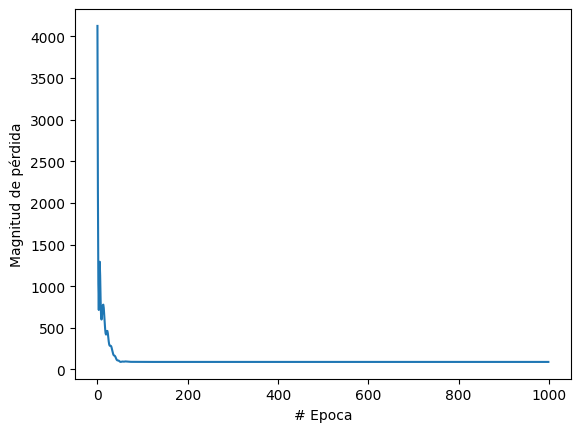

In [26]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [27]:
print("Hagamos una predicción")
resultado = modelo.predict([100.0])
print("El resultado es " + str(resultado) + "fahrenheit")


Hagamos una predión
1/1 [==============================] - 0s 232ms/step
El resultado es [[218.18437]]fahrenheit


In [28]:
print("Variables internas del modelo")
#print(capa.get_weights())
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[ 0.7146542 ,  0.06851655, -0.13455273]], dtype=float32), array([ 4.250423  , -0.38702792, -2.330609  ], dtype=float32)]
[array([[-1.231143  ,  0.42516685,  0.77988636],
       [ 0.34142894, -0.0559153 ,  0.21258801],
       [-0.31604978,  1.3057163 , -0.8207172 ]], dtype=float32), array([-3.983029,  0.121058,  4.164664], dtype=float32)]
[array([[-1.1593463 ],
       [-0.07697935],
       [ 1.4266025 ]], dtype=float32), array([4.086656], dtype=float32)]


## De Farenheit a Celsius 

In [ ]:
fahrenheit = np.array([-40, -14, 32, 46, 59, 72, 100], dtype=float)
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)

In [ ]:
#capa = tf.keras.layers.Dense(units=1, input_shape=[1])
#modelo = tf.keras.Sequential([capa])

oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1, input_shape=[1])
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [ ]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [ ]:
print("Comenzando entrenamiento...")
historial = modelo.fit(fahrenheit, celsius, epochs=1000, verbose=False)
print("Modelo entrenado!")

In [ ]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [ ]:
print("Hagamos una predicción")
resultado = modelo.predict([218.0])
print("El resultado es " + str(resultado) + "celsius")

In [ ]:
print("Variables internas del modelo")
#print(capa.get_weights())
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

## Otro ejemplo:

In [ ]:
List1 = np.array([-4, -11, 32, 7, 59, 72, 100,-14, -111, 312, 71, 159, 721, 1001], dtype=float)
List2 = np.array([-3, -10, 33, 8, 60, 73, 101, -13, -110, 313, 72, 160, 722, 1002], dtype=float)

In [ ]:

oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1, input_shape=[1])
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [ ]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [ ]:
print("Comenzando entrenamiento...")
historial = modelo.fit(List1, List2, epochs=1000, verbose=False)
print("Modelo entrenado!")

In [ ]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [ ]:
print("Hagamos una predicción")
resultado = modelo.predict([4972524])
print("El resultado es el número" + str(resultado))

In [ ]:
print("Variables internas del modelo")
#print(capa.get_weights())
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

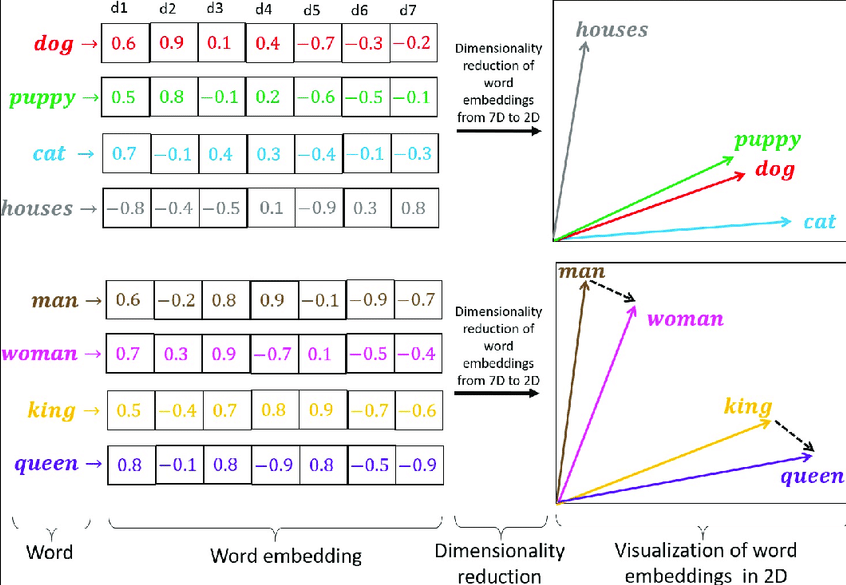

## NLP RECSYS

In [ ]:
# Cálculo de la  Similaridad coseno empleando sklearn:
# Librarias
import pandas as pd
import numpy as np
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
from sklearn.metrics.pairwise import cosine_similarity
Juan = [5,4,4]
Diego = [4,5,5]
cosine_similarity([Juan, Diego])

# Calculo de la Similaridad a mano:
(5*4 + 4*5 + 4*5)/(np.sqrt(5**2+4**2+4**2)*np.sqrt(4**2+5**2+5**2))
# Numpy
np.dot(Juan,Diego)/np.dot(np.linalg.norm(Juan), np.linalg.norm(Diego))
# Item-Based Collaborative Filtering
user_item = np.array([[5, np.nan, 4],[4,3,5],[4,5,5],[np.nan, 5, np.nan], [np.nan, 5, 3]])
# En este ejemplo vamos a calcular la similitud coseno considerando solo los valores distintos de nan. 
# Vamos a usar numba: Numba translates Python functions to optimized machine code at runtime using the industry-standard LLVM compiler library. Numba-compiled numerical algorithms in Python can approach the speeds of C or FORTRAN. "

import numba
@numba.jit(target='cpu', nopython=True)
def fast_cosine(u, v):
    m = u.shape[0]
    udotv = 0
    u_norm = 0
    v_norm = 0
    for i in range(m):
        if (np.isnan(u[i])) or (np.isnan(v[i])):
            continue
            
        udotv += u[i] * v[i]
        u_norm += u[i] * u[i]
        v_norm += v[i] * v[i]

    u_norm = np.sqrt(u_norm)
    v_norm = np.sqrt(v_norm)
    
    if (u_norm == 0) or (v_norm == 0):
        ratio = 0 ## o podria devolver nan
    else:
        ratio = udotv / (u_norm * v_norm)
    return ratio

## vamos a calcular la distancia usando pdist y squareform
## la primera vez que lo corramos va a ser un poco más lento
similitudes = squareform(pdist(user_item,metric=fast_cosine))

## para comparar con la diapositiva: 
similitudes = np.round(similitudes,3)
similitudes

## Si queremos predecir el score que Nico le da a Study:
nico = user_item[:,0]
study = similitudes[:,4]

np.nansum(nico*study)/np.sum(study[~np.isnan(nico)])

## otra opcion seria hacer el producto de la matriz user_item con la matriz de similitudes 
#luego al momento de sacar el rating predicho, calcular k y dividir

# Ejemplo con datos reales: el dataset movielens
mlens = pd.read_csv("u.data",sep="\t",header=None)
mlens.columns = ["user_id","item_id","rating","timestamp"]

## primero vamos a mapear los ids de usuario y de pelicula a un nuevo id que sea un indice
user2ix = {user:ix for ix,user in enumerate(mlens.user_id.unique())}
ix2user = {user2ix[k]:k for k in user2ix.keys()}

item2ix = {item:ix for ix,item in enumerate(mlens.item_id.unique())}
ix2item = {item2ix[k]:k for k in item2ix.keys()}

mlens_con_ix = mlens.copy()
mlens_con_ix["user_id"] = mlens.user_id.apply(lambda x: user2ix[x])
mlens_con_ix["item_id"] = mlens.item_id.apply(lambda x: item2ix[x])

## hacemos un pivot sobre el dataframe para tener la matriz usuario-item
## ojo, esta no es la forma mas eficiente: estamos usando un dataframe
## pero pdist y cdist no toman una sparse matrix como input
## de todas maneras, para este problema no requerimos una sparse matrix necesariamente
mlens_pivotada = mlens.pivot("item_id","user_id")["rating"]

## calculamos la similitud
similitudes = squareform(pdist(mlens_pivotada,metric=fast_cosine))

## vamos a usar una funcion que devuelva el rating original si este existe
## caso contrario, devuelve el predicho
def predecir(user,item,similitudes,original,user2ix,item2ix):
    ix_user = user2ix[user]
    ix_item = item2ix[item]
    score = original.iloc[ix_item,ix_user]
    if np.isnan(score):
        item_similitudes = similitudes[:,ix_item]
        user_scores = original.iloc[:,ix_user].values
        k = np.nansum(item_similitudes[~np.isnan(user_scores)]) ## este es el denominador de la funcion
        
        if k == 0: 
            ## si nadie le puso puntaje al item o las similitudes son todas 0 devuelvo un score arbitrario
            return 2.5
        
        score = np.nansum(user_scores*item_similitudes)
        score = score/k
    return score

    user = 554
item = 651
predecir(user,item,similitudes,mlens_pivotada,user2ix,item2ix)

### LAB: La maldición de la dimensionalidad
Para entender el efecto de la cantidad de dimensiones en la capacidad predictiva del modelo vamos a trabajar en un clasificador de noticias de dos diarios argentinos para intentar distinguir entre uno y otro a partir del vocabulario que utilizan. <br />
Para esto vamos a implementar un modelo de tipo Naïve Bayes con vectorización de tipo TF-IDF.

import pandas as pd
df_clarin = pd.read_csv('clarin.csv')
df_clarin['class'] = 0

df_p12 = pd.read_csv('pagina12.csv')
df_p12['class'] = 1

df = pd.concat([df_clarin,df_p12])
df.sample(5)

# 1. Limpieza
# 1.1 Faltantes: A partir del dataset observamos que los campos que probablemente contengan el vocabulario relevante son "cuerpo", "título" y "resumen".Sacar del análisis los registros que no tienen cuerpo o título disponible y completar los resúmenes faltantes con una campo en blanco.

df = df[df['cuerpo'].notnull()].copy()
df = df[df['titulo'].notnull()].copy()

df['resumen'].fillna('',inplace=True)

# 1.2 Suplementos relevantes: Para mejorar la clasificación es conveniente retirar las secciones donde los dos diarios utilizan un vocabulario similar y muy específico del dominio como, por ejemplo, las relacionadas a deportes.
# Filtramos las noticias relacionadas a deportes
df = df[df['suplemento'].str.lower().str.contains('deportes')==False].copy()

df['suplemento'].value_counts()

# 1.3 Corpus: Construir la columna sobre la cual vamos a predecir concatenando el título, resumen y cuerpo de las distintas noticias.
df['full'] = df['cuerpo'].astype('str') + df['titulo'] + df['resumen']

# 1.4 Normalización del texto
Primero es conveniente pasar todo el corpus a letras minúsculas.
Para mejorar el clasificador es importante sacar todos los acentos que pueden generar diferencias artificiales entre palabras según estén o no puestos. Hint: Utilizar el módulo unidecode
Una vez retirados los acentos, quitar todos los signos de puntuación para dejar únicamente palabras. Hint: utilizar una expresión regular, por ejemplo, r'([^\s\w]|_)+' para reemplazar todo lo que no sean palabras.
df['full'] = df['full'].str.lower()
from unidecode import unidecode
df['full'] = df['full'].apply(unidecode)

import re
df['full'] = df['full'].apply(lambda x: re.sub(r'([^\s\w]|_)+', '', x))
df['full'].sample(3)

# 2. Modelo
Vectorizar el corpus resultante con TF-IDF y aplicar un modelo Naive Bayes con un split simple entre train y test. 
<br />
¿Cuál es la dimensión de la matriz de features? ¿Cuál es el accuracy obtenido? <br />
Dibujar la matriz de confusión.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['full'], df['class'], test_size=0.33, random_state=42) 


# Sólo para chequear el tamaño de la matriz de features
from sklearn.feature_extraction.text import TfidfVectorizer
m1 = TfidfVectorizer()
X_train_vec = m1.fit_transform(X_train)
X_train_vec.shape

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(X_train, y_train)
labels = model.predict(X_test)
labels

from sklearn.metrics import accuracy_score
accuracy_score(y_test, labels)

from sklearn.metrics import confusion_matrix
import seaborn as sns;
import matplotlib.pyplot as plt
%matplotlib inline
mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Clarin','Pagina'], yticklabels=['Clarin','Pagina'])
plt.xlabel('true label')
plt.ylabel('predicted label');

## 3. Reducción de la dimensionalidad

¿Cuál es la relación entre la cantidad de features y la cantidad de casos de entrenamiento? De acuerdo a la maldición de la dimensionalidad esta relación es un problema.<br/>
Una de las técnicas más comunes para reducir dimensiones es utilizar "stopwords", una lista con las palabras de cada idioma que no tienen un peso semántico importante. <br />
Entrenen nuevamente el modelo quitando las stopwords del español que se encuentran en el archivo "stopwords.csv". <br />
¿Qué pasa con la cantidad de dimensiones de la matriz de features? ¿Y con el accuracy?


stopwords = pd.read_csv('stopwords.csv',header=None)[0]

from unidecode import unidecode
stopwords = stopwords.apply(unidecode) 

# Es importante que las stopwords se encuentren en una lista
stopwords = list(stopwords)

# Sólo para chequear el tamaño de la matriz de features
m1 = TfidfVectorizer(stop_words = list(stopwords))
X_train_vec = m1.fit_transform(X_train)
X_train_vec.shape

model = make_pipeline(TfidfVectorizer(stop_words = list(stopwords)), MultinomialNB())

model.fit(X_train, y_train)
labels = model.predict(X_test)

accuracy_score(y_test, labels)

from sklearn.metrics import confusion_matrix
import seaborn as sns;
import matplotlib.pyplot as plt
%matplotlib inline
mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Clarin','Pagina'], yticklabels=['Clarin','Pagina'])
plt.xlabel('true label')
plt.ylabel('predicted label');

## 4. Avanzando en la reducción de dimensiones
El modelo mejora cuando quitamos las stopwords pero todavía tenemos una cantidad de dimensiones demasiado alta para 
la cantidad de datos que tenemos.
Pensemos lo siguiente ¿Qué valor tienen las palabras que aparecen una o dos veces en todo el corpus a la hora de discriminar? Para remover del análisis las palabras que ocurren menos de determinada cantidad de veces, la clase TfidfVectorizer tiene un parámetro min_df. 

Prueben setear el parámetro min_df en 6 y volver a correr el modelo.
<br />
<strong>
¿A cuánto se reduce la dimensión de la matriz de features?
<br />
¿Cuánto mejora la performance del algoritmo?
<strong />

model = make_pipeline(TfidfVectorizer(stop_words = list(stopwords), min_df=6), MultinomialNB())

model.fit(X_train, y_train)
labels = model.predict(X_test)

model_vec2 = TfidfVectorizer(stop_words = list(stopwords), min_df=10)

X_train_vec = model_vec2.fit_transform(X_train)

X_train_vec.shape

accuracy_score(y_test, labels)

from sklearn.metrics import confusion_matrix
import seaborn as sns;
import matplotlib.pyplot as plt
%matplotlib inline
mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Clarin','Pagina'], yticklabels=['Clarin','Pagina'])
plt.xlabel('true label')
plt.ylabel('predicted label');
pred = model.predict(['La candidata a senadora de Unidad Ciudadana dijo que la decisión de la Sala II de la Cámara Federal porteña ordenar la detención de Julio De Vido es parte de la campaña impulsada por el macrismo. En una entrevista con Telefe cuestionó también al Gobierno por la defensa de la Gendarmería frente a la desaparición de Santiago Maldonado.'])
print('Clarin' if pred[0] == 0 else 'Página 12')

pred = model.predict(['La Cámara exigió la detención de De Vido por su influencia para destruir pruebas '])
print('Clarin' if pred[0] == 0 else 'Página 12')
